# CNN Visualization

In [11]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot

In [12]:
model = VGG16()

In [13]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
from keras.utils import plot_model

plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
for i in range(len(model.layers)):

    #check convolutional layer
    if 'conv' not in model.layers[i].name:
        continue
    #get filter weights
    filters,biases = model.layers[i].get_weights()
    print("layer name ",i,model.layers[i].name,filters.shape)

layer name  1 block1_conv1 (3, 3, 3, 64)
layer name  2 block1_conv2 (3, 3, 64, 64)
layer name  4 block2_conv1 (3, 3, 64, 128)
layer name  5 block2_conv2 (3, 3, 128, 128)
layer name  7 block3_conv1 (3, 3, 128, 256)
layer name  8 block3_conv2 (3, 3, 256, 256)
layer name  9 block3_conv3 (3, 3, 256, 256)
layer name  11 block4_conv1 (3, 3, 256, 512)
layer name  12 block4_conv2 (3, 3, 512, 512)
layer name  13 block4_conv3 (3, 3, 512, 512)
layer name  15 block5_conv1 (3, 3, 512, 512)
layer name  16 block5_conv2 (3, 3, 512, 512)
layer name  17 block5_conv3 (3, 3, 512, 512)


In [16]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[1].get_weights()

In [17]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()

filters = (filters - f_min) / (f_max - f_min)

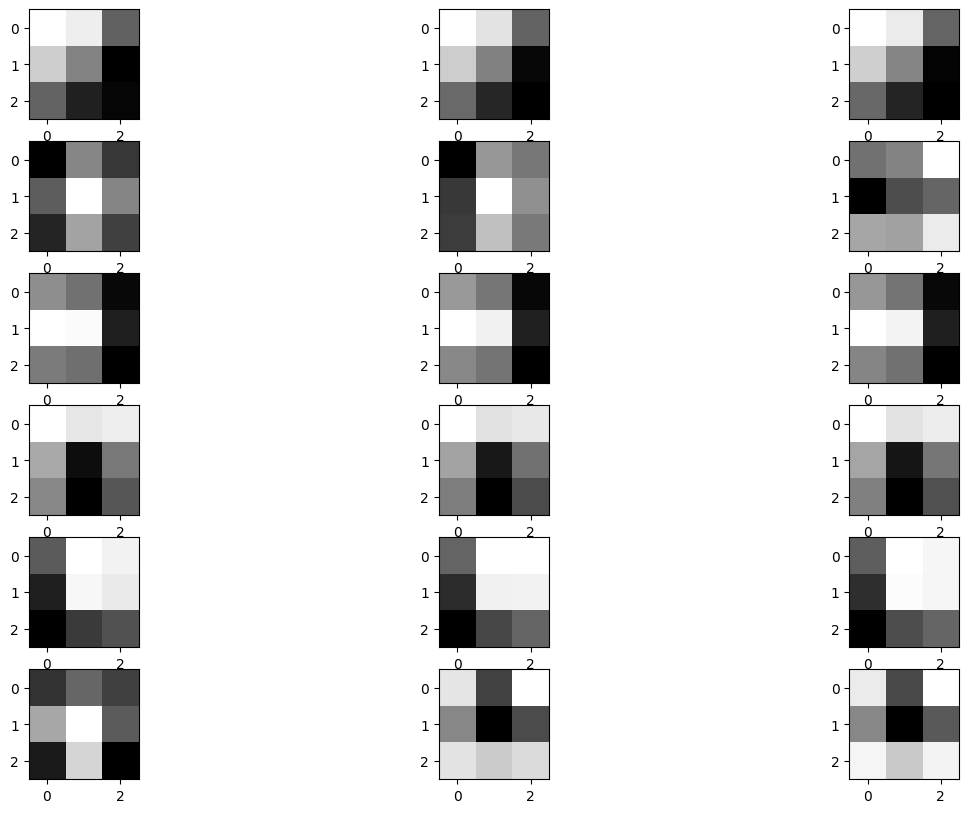

In [18]:
n_filters =6
ix=1
fig = pyplot.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
pyplot.show()

In [19]:
from tensorflow.keras.models import Model

model = Model(inputs=model.inputs , outputs=model.layers[1].output)


In [20]:
import tensorflow
from tensorflow import _keras
from keras.preprocessing import image
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

image = load_img(r"D:\copy of htdocs\practice\Python\200days\Day194 Deep Learning Day 24\v_k.jpg" , target_size=(224,224))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = np.expand_dims(image, axis=0)

image = preprocess_input(image)

NameError: name 'load_img' is not defined

In [ ]:
image

NameError: name 'image' is not defined

1/1 [==============================] - 0s 42ms/step


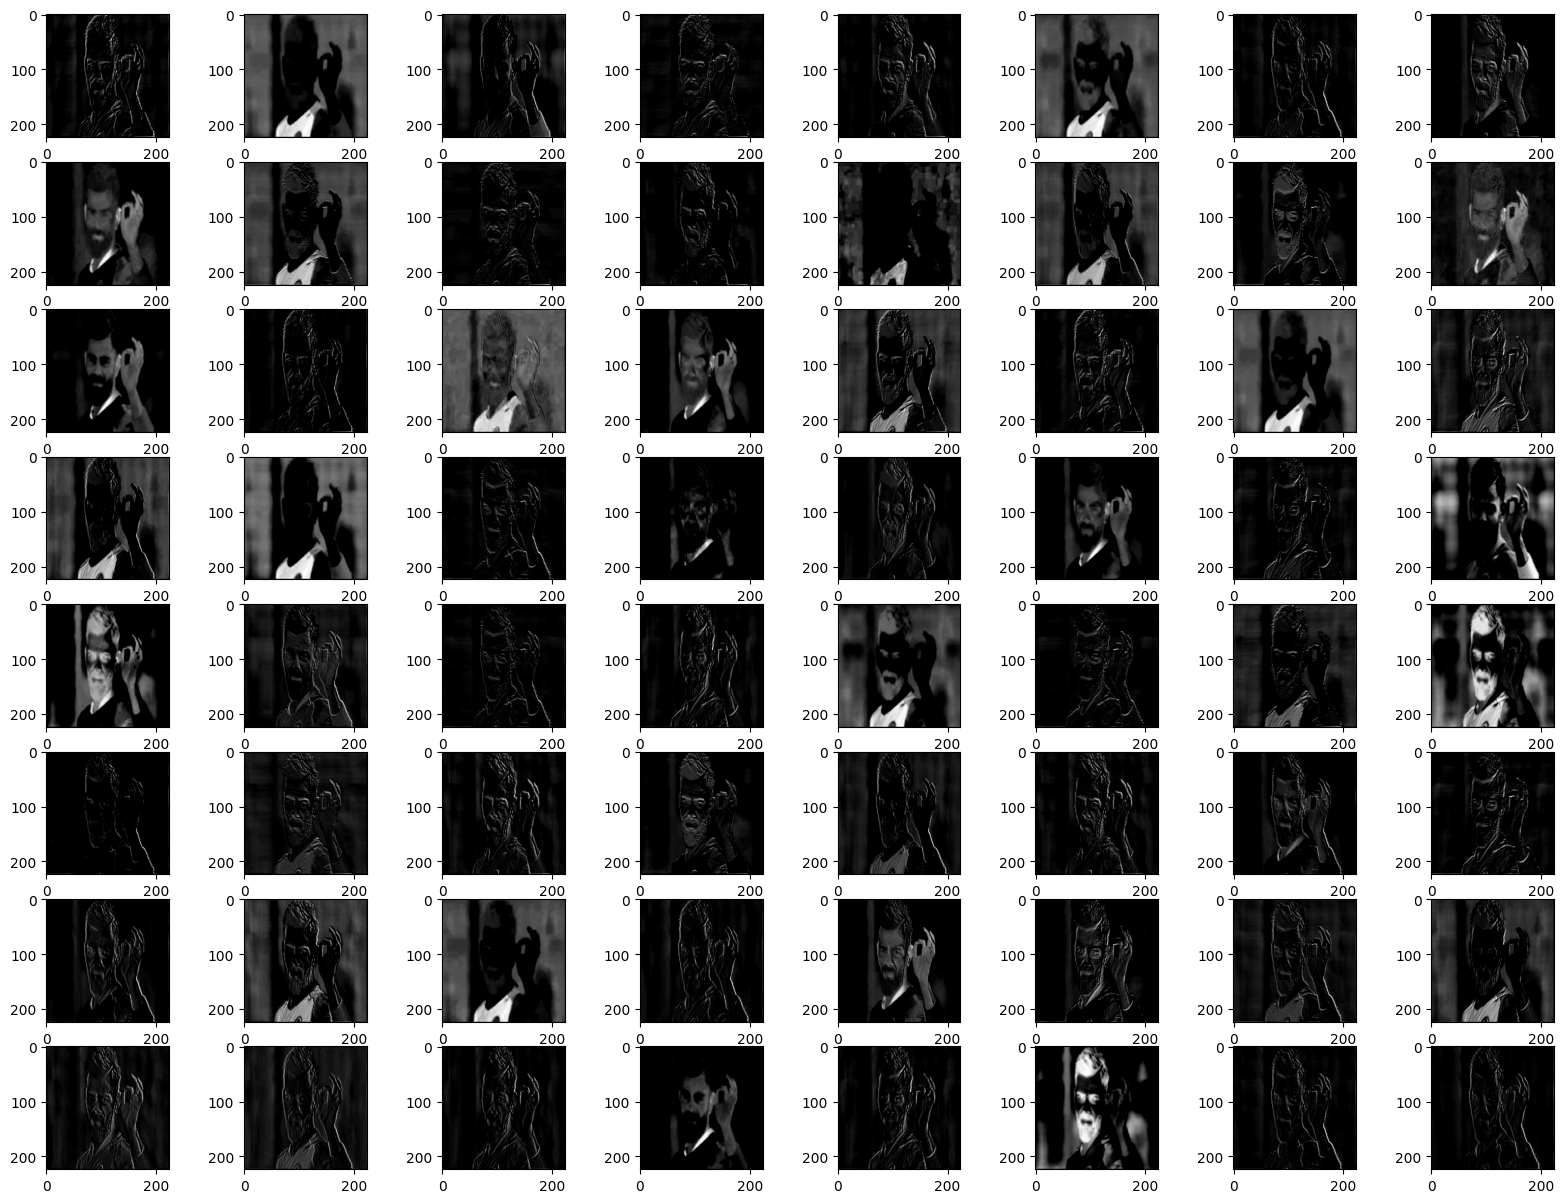

In [ ]:
#calculating features_map
features = model.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')
    
pyplot.show()

In [ ]:
model2 = VGG16()

In [ ]:
layer_index = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model( inputs= model2.inputs, outputs = outputs)

1/1 [==============================] - 0s 231ms/step


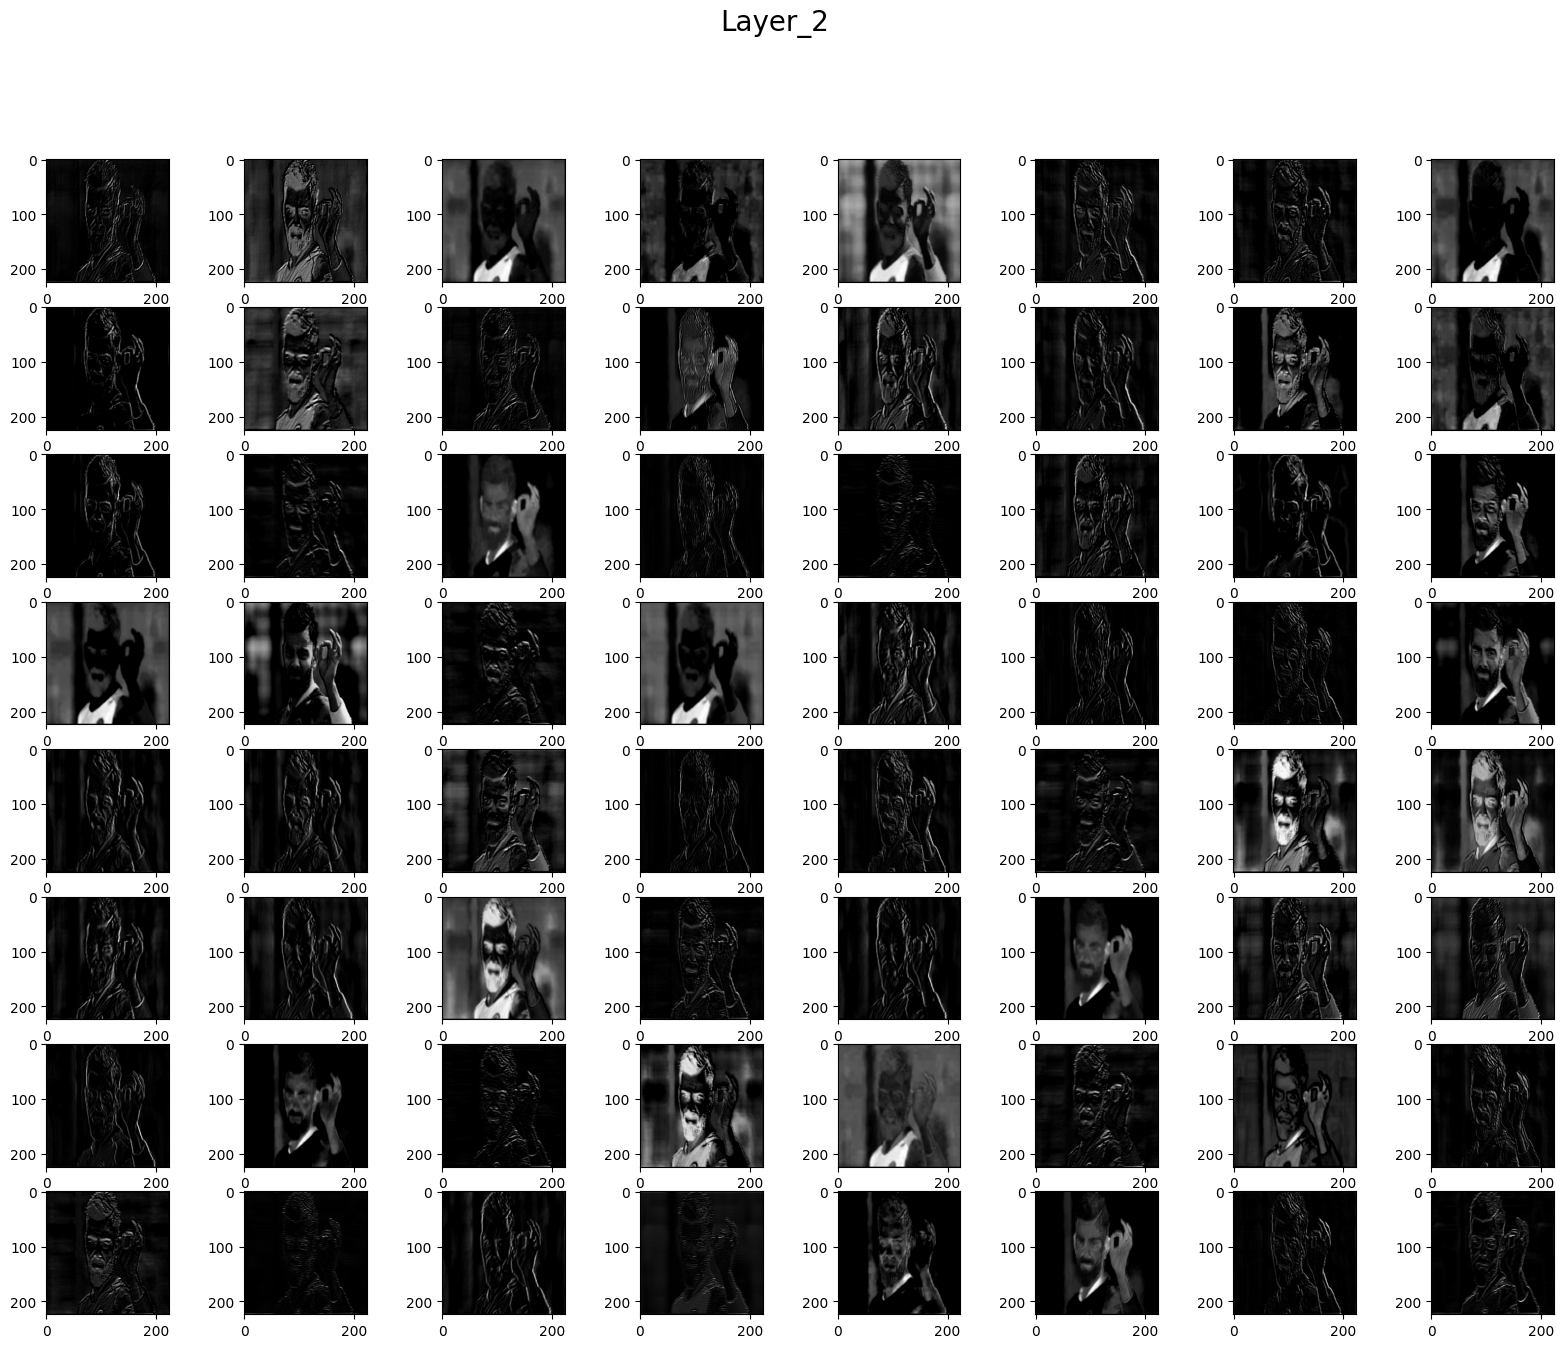

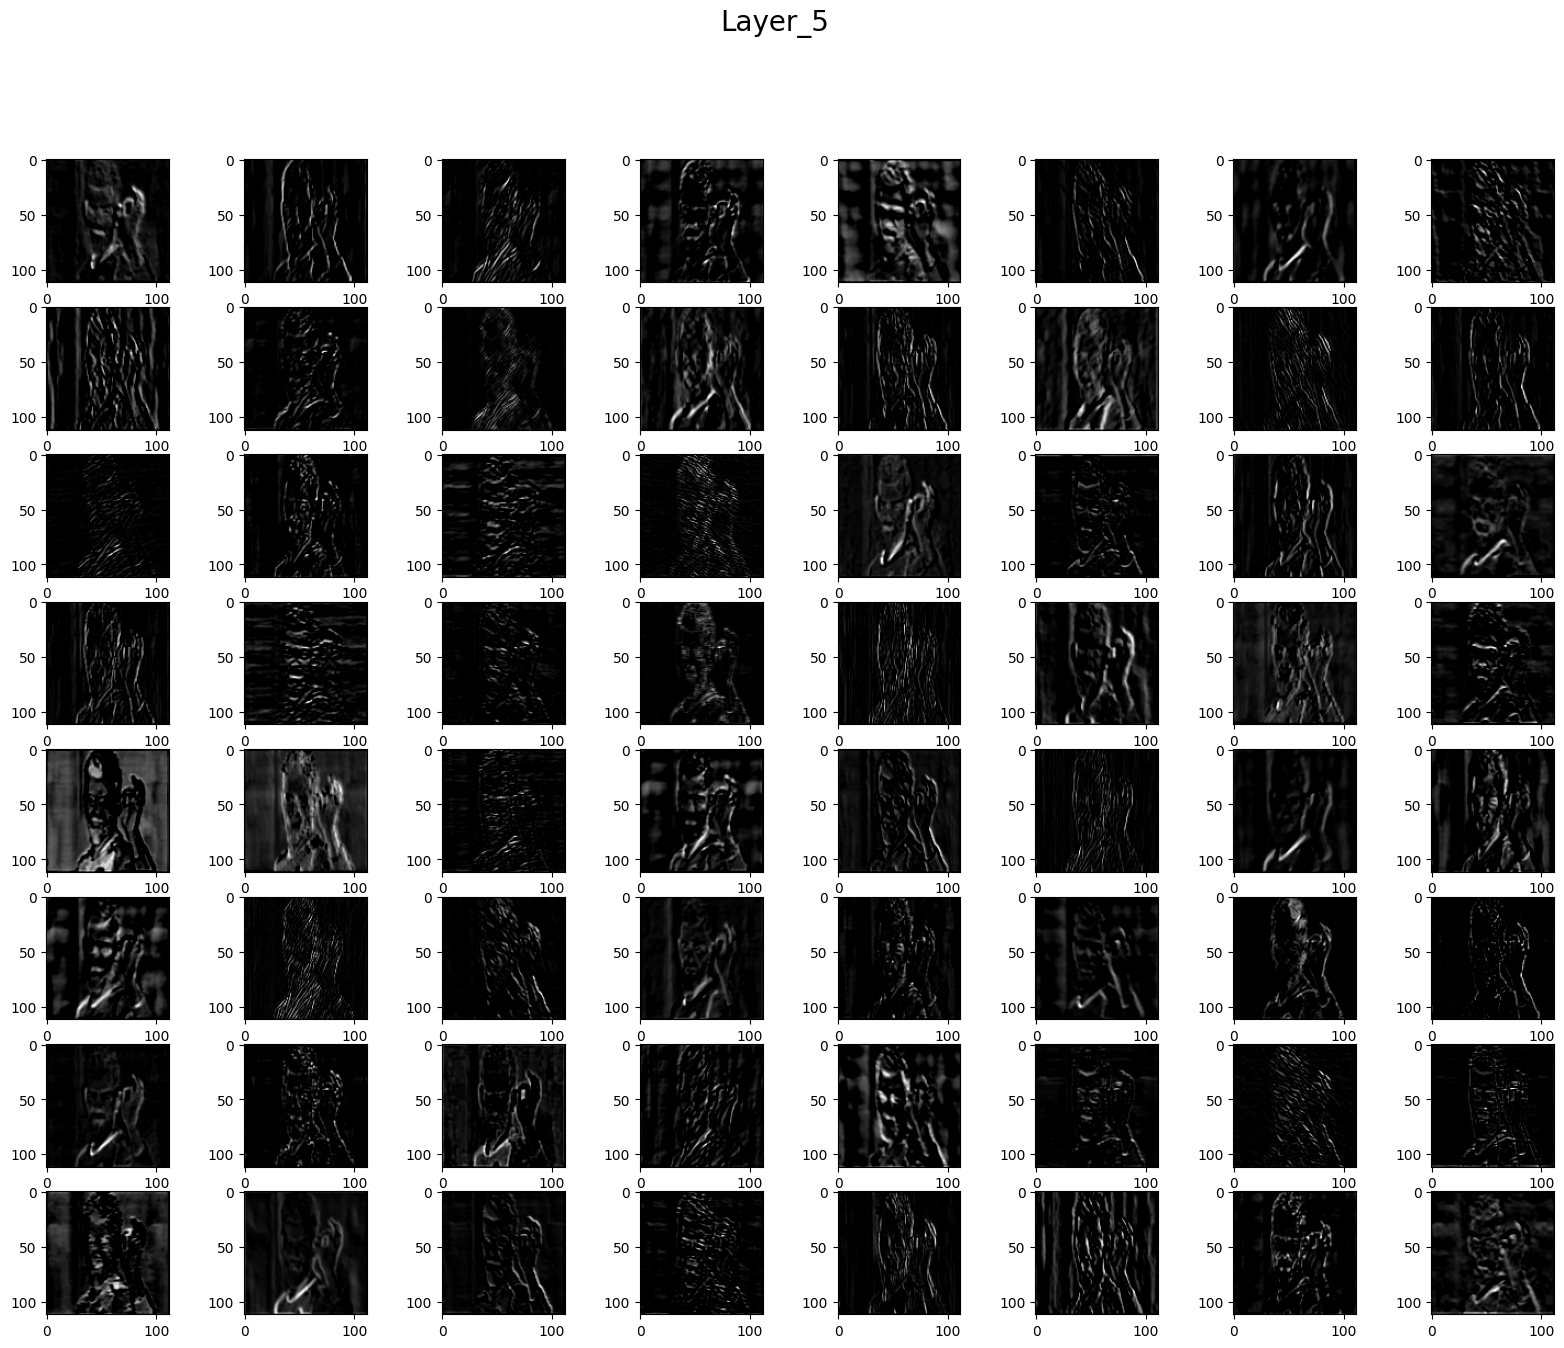

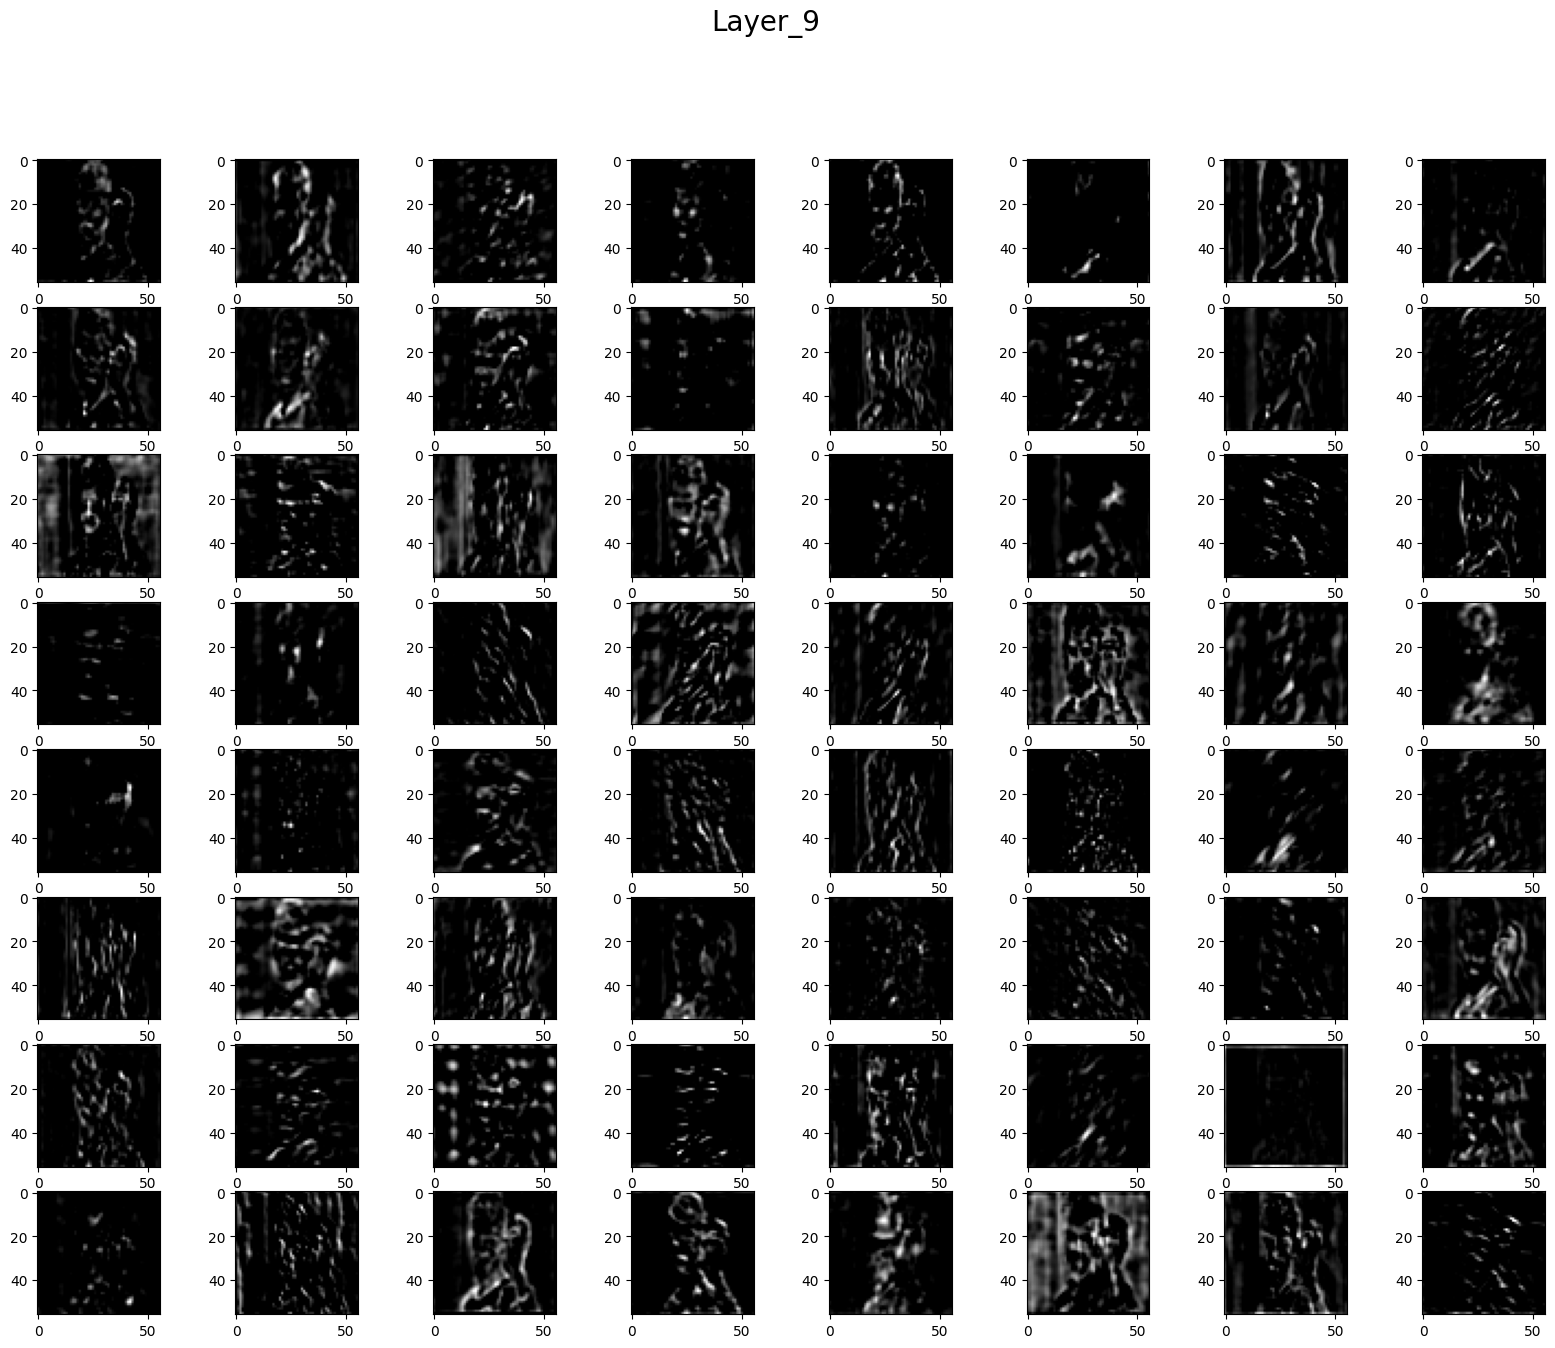

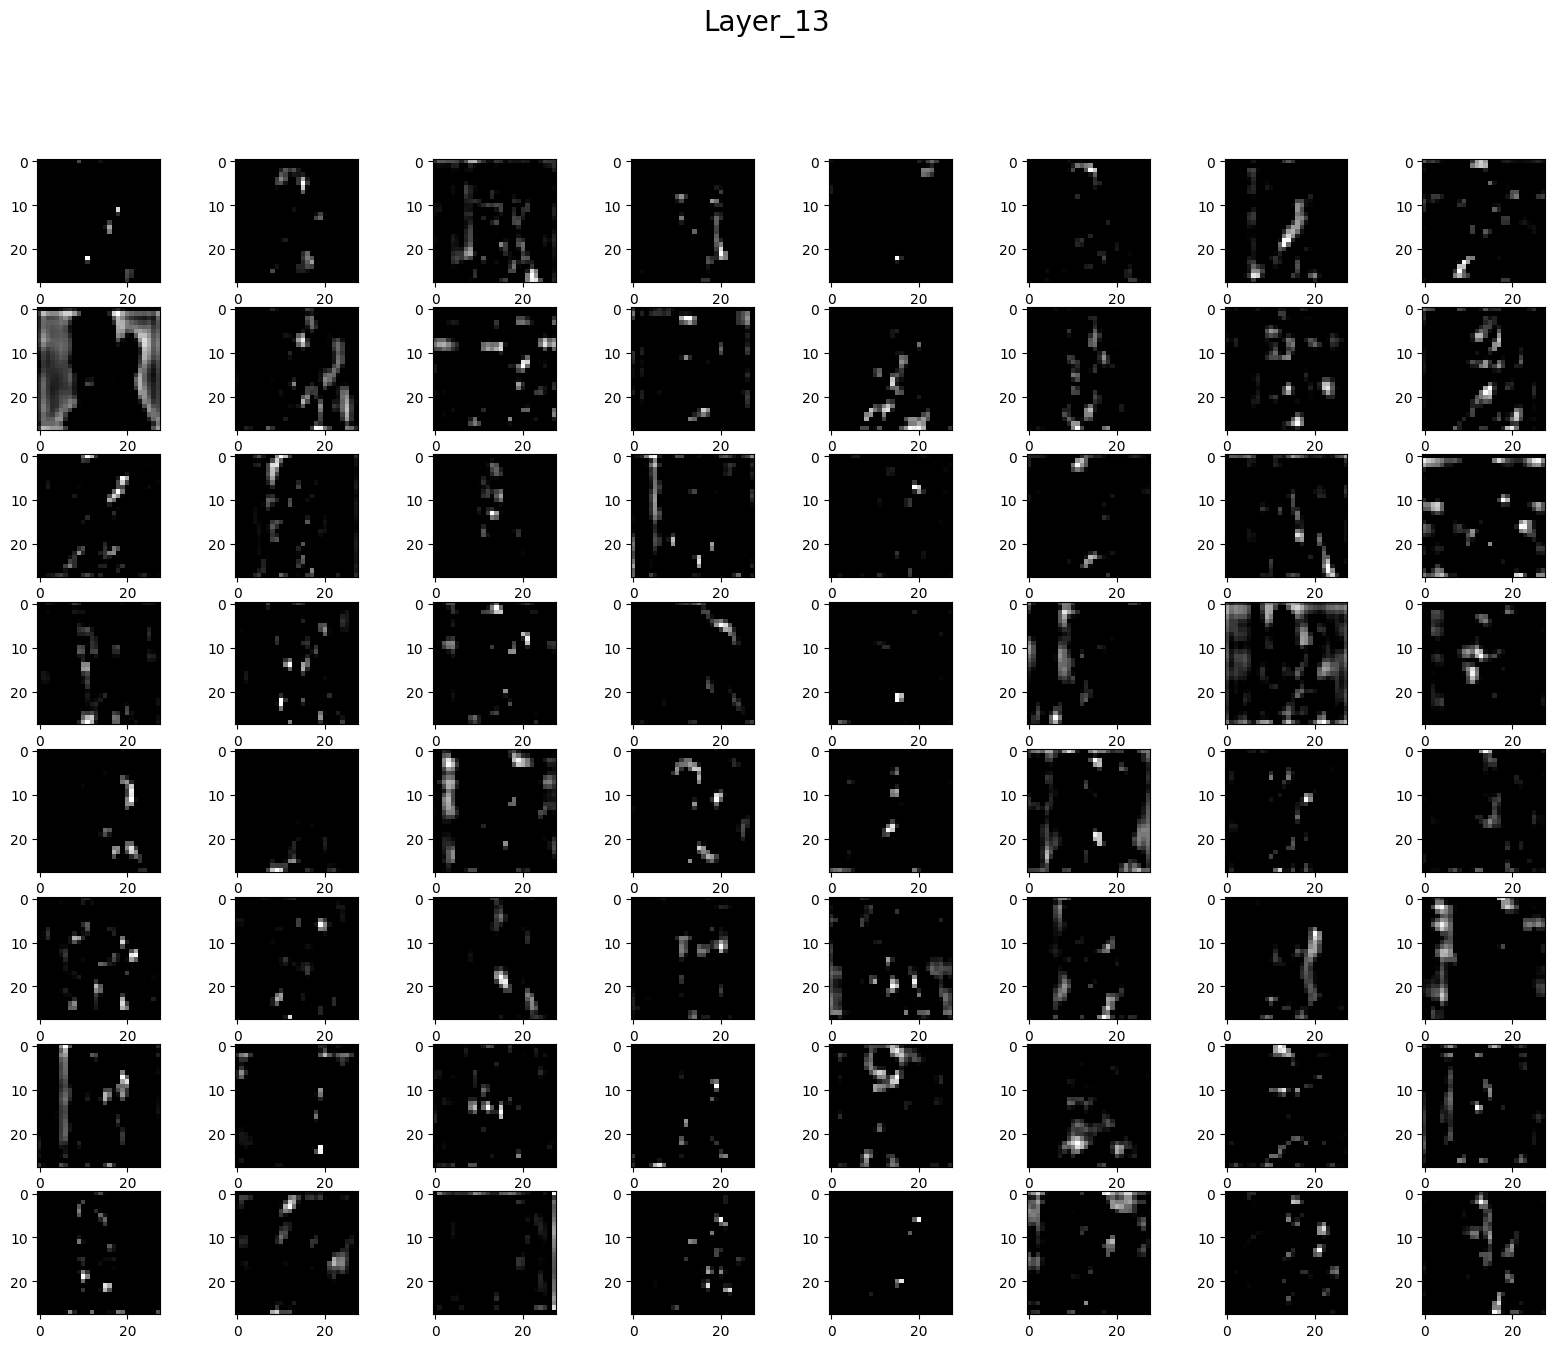

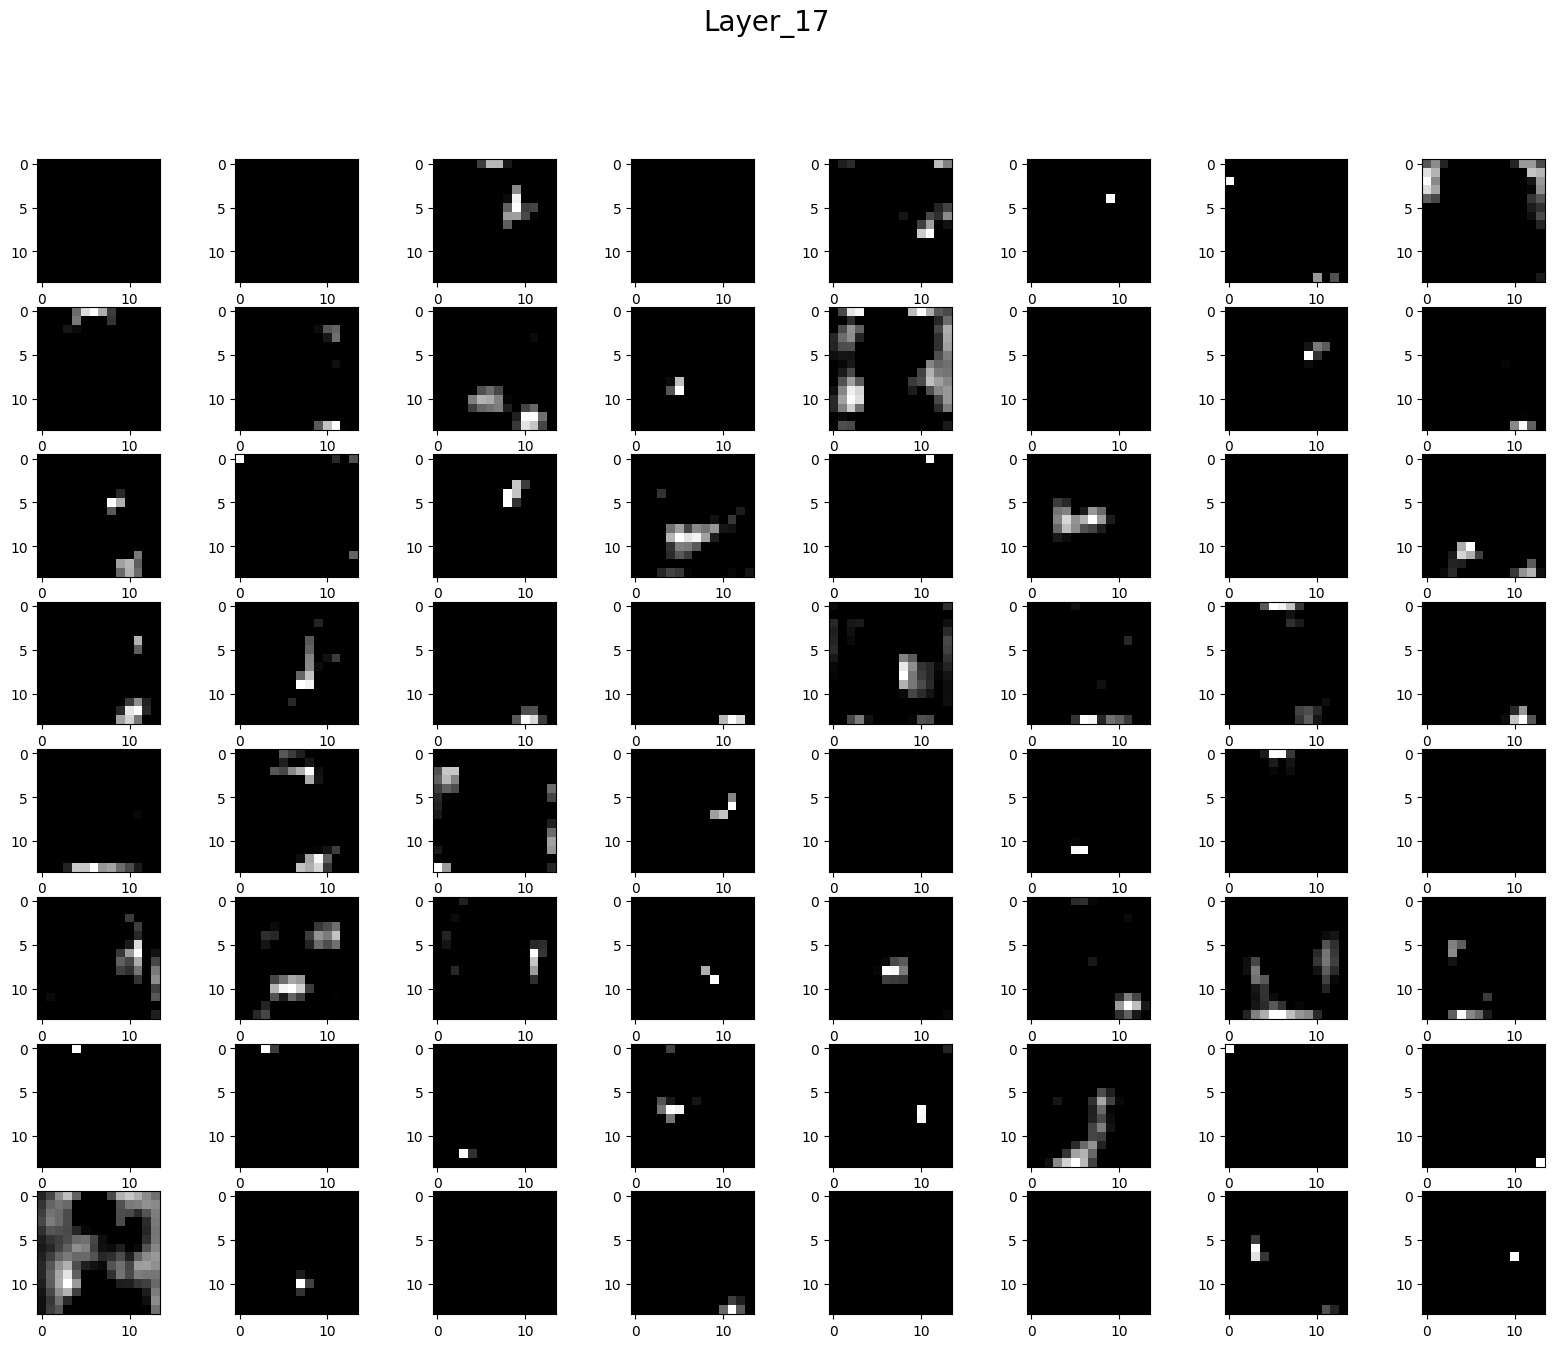

In [ ]:
feature_map = model3.predict(image)

for i,fmap in zip(layer_index,feature_map):
    fig = pyplot.figure(figsize=(20,15))
    fig.suptitle("Layer_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        pyplot.subplot(8,8,i)
        pyplot.imshow(fmap[0,:,:,i-1] , cmap='gray')
    
pyplot.show()